# Clustering Using K-Means:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.genfromtxt(r'Tshirts Dataset.csv', delimiter=',')
df = pd.DataFrame(X,columns=['Lenght',"Width"])
df.head()

,Lenght,Width
0,68.970904,35.895131
1,65.648142,33.547547
2,56.521632,30.924471
3,64.298420,36.877395
4,56.420191,31.429438


In [3]:
K = 3                # number of cluster centroids
iterations = 1000    #number of iterations

Text(0, 0.5, 'Width')

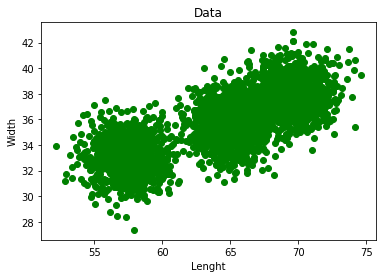

In [4]:
plt.scatter(df["Lenght"],df["Width"],c="green")
plt.title("Data")
plt.xlabel("Lenght")
plt.ylabel("Width")

## 1.1 - Initialize Centroids

In [5]:
def Init_Centroids(X, K):
    m, n = X.shape
    
    # You should return this values correctly
    Centroids = np.zeros((K, n))

    
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    Centroids = X[randidx[:K], :]
    
    return Centroids

## 1.2 - Calculate Euclidean Distance
Euclidean Distance is a method to calculate distance between two points ( P and Q )using the Following equation 
$$ d\left( P,Q\right)   = \sqrt {\left( Q_{0}-P_{0}\right)^2 + \left  ( Q_{1}-P_{1}\right)^2} $$

In [6]:
def Calculate_Distance(P,Q):
    # P and Q are two points each one of them contains 2 variables Ex. P[0] = Length, P[1] Width, of point P
    
    Distance = 0
    
    Distance = np.sqrt( (P[0]-Q[0])**2 + (P[1]-Q[1])**2 )
    
    return Distance

## 1.3 - Get Examples Centroids
in this section we need to get the nearest centroid to each training example $x^{(i)}$ Given the list of centroids positions.

Your task is to complete the code in the function `GetExamplesCentroids`. This function takes the data matrix `X` and the locations of the centroids inside `Centroids` and should output a one-dimensional array `ExamplesCentroids` that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.
Also be noted that the function should get each example nearest Centroid **According To the Euclidean Distance**

In [7]:
def AssignItemCentroid(X, Centroids):
    
    ExamplesCentroids = np.zeros(X.shape[0], dtype=int)
  
    for i in range(len(X)):
      selected_cluster = -1
      least_distance = 100000000
      for j in range(len(Centroids)):
        if Calculate_Distance(X[i], Centroids[j]) < least_distance:
          least_distance = Calculate_Distance(X[i], Centroids[j])
          selected_cluster = j
      ExamplesCentroids[i] = selected_cluster    

   
    return ExamplesCentroids

## 1.4 - Computing centroid means

Given each example nearest centroid, next we should recalculatee each centroid according to the mean of the points that were assigned to it. for every centroid $k$ we set

$$ mean_k := \frac{1}{S_k} \sum_{i \in S_k} x^{(i)}$$

where $S_k$ is the number of examples assigned to the current centroid $k$, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

You should now complete the code in the function `computeCentroids`. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [8]:
def computeCentroidsMeans(X, ExamplesCentroids, K):
    m, n = X.shape
    Centroids = np.zeros((K, n))
    
   
    for i in range(K):
      sum = 0
      counter = 0
      for j in range(len(X)):
        if ExamplesCentroids[j] == i:
          sum += X[j]
          counter += 1
      Centroids[i] = sum / counter
    
    
    return Centroids

## 1.5 - Train K-Means
The K-means algorithm steps is as follows:

```python
Centroids = Init_Centroids(X, K)
for i in range(iterations):
    # Get the Closet Centroid list that corresponds to each training example
    ExamplesCentroids = GetExamplesCentroids(X, Centroids)
    
    # Change Centroid Position using Mean
    Centroids = computeCentroidsMeans(X, ExamplesCentroids, K):
```

Then you may use the last Centroids values to get a cluster for any other input 

In [9]:
def Run_KMeans(iterations , K):
    Centroids = None
    ExamplesCentroids = None
  
    Centroids = Init_Centroids(X, K)
    for i in range(iterations):
      ExamplesCentroids = AssignItemCentroid(X, Centroids)
      Centroids = computeCentroidsMeans(X, ExamplesCentroids, K)
   
    
    return Centroids,ExamplesCentroids

Text(0, 0.5, 'Width')

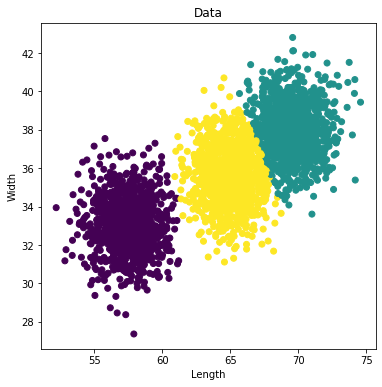

In [10]:

_,ExamplesCentroids = Run_KMeans( iterations , K)

fig = plt.figure(figsize=(6, 6))
AllData = fig.add_subplot(111)
AllData.scatter(X[:, 0], X[:, 1],c=ExamplesCentroids)
plt.title("Data")
plt.xlabel('Length')
plt.ylabel('Width')

# Optimization 



## 2.1 cost function

In [12]:
def cost_function(X, ExamplesCentroids, K , Centroids):
    cost = 0
    for i in range(K):
      for j in range(len(X)):
        if ExamplesCentroids[j] == i:
          cost += (Calculate_Distance(X[j],Centroids[i]))**2
    return cost

## 2.2 Choosing number of cluster 


In [13]:
for i in range(1 , 8):
  Centroids,ExamplesCentroids = Run_KMeans(iterations , i)
  cost= cost_function(X, ExamplesCentroids, i , Centroids)
  print(cost)


100028.14551897897
26187.318876637368
12647.249030829626
11250.48115007592
9619.761219140451
9007.453743459779
7303.089675454638


In [14]:
l=np.array([100028.14551897897,26187.318876637368,12647.249030829626,11250.48115007592,9619.761219140451,9007.453743459779,7303.089675454638])
n=np.array([1,2,3,4,5,6,7])
cost_data = pd.DataFrame(n,columns=["cluster_centroids_number"])
cost_data["cost_values"] = l
cost_data.to_csv('cost_func+centroid_number.csv') 
cost_data.head()

,cluster_centroids_number,cost_values
0,1,100028.145519
1,2,26187.318877
2,3,12647.249031
3,4,11250.481150
4,5,9619.761219


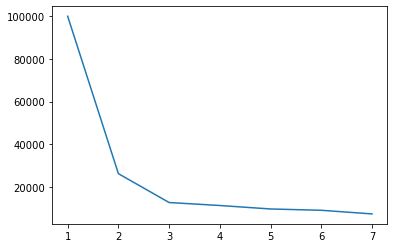

In [15]:
#elbow rule
plt.plot(cost_data["cluster_centroids_number"],cost_data["cost_values"]);